<a href="https://colab.research.google.com/github/alexisdr/uned-tfg/blob/main/UNED-TFG-1-analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de los datos

Se analizan los datos del Corpus PFG.

# Parameters

*  GoldStandardTrainingEAs.txt: contiene una relación de IDS de actos clínicos seguidos de una lista de uno o varios códigos EAs, en caso de que sean aplicables, o NONE en caso de no se haya idetnificado ningún código de efecto adverso. Todos los valores están separados por espacios. Ejemplos:
```
24866017 T50.2X5A
27448436 T83.021A T83.511A T83.091A Y84.6
25205191 NONE
```
*  EAs.txt: listado de todos los códigos de efectos adversos del CIE10 y su tipo. Ejemplo: 
```
D61.810 - PROC
D61.811 - MED
```
*  CIE-10.tsv: definición del CIE10 completo.
*  Training: carpeta que contiene todos los informes médicos del conjunto de entrenamiento. El nombre del archivo está compuesto por el acto clínico y el identificador del informe. Ejemplo: 23062488-158483734.txt


In [2]:
ruta_base = '/drive/My Drive/CorpusPFG/'

#Archivos y rutas de los datos del CORPUS
ruta_archivo_GoldStandardTrainingEA = ruta_base + 'GoldStandardTrainingEAs.txt'
ruta_archivo_codigos_EA = ruta_base + 'EAs.txt'
ruta_archivo_CIE10 = ruta_base + 'CIE-10.tsv'
ruta_archivos_entrenamiento = ruta_base + 'Training/'

In [3]:
!pip install -q unidecode 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 7.7 MB/s eta 0:00:00


Se realiza el montaje de la unidad de Google Drive para acceder a los ficheros

In [4]:
from google.colab import drive

drive.mount('/drive')

Mounted at /drive


# EAs disponibles en los casos clínicos

Carga del archivo de texto GoldStandardTrainingEAs.txt y GoldStandardTestEAs.txt en un data set

In [5]:
import pandas as pd

column_names = ["Acto", "TieneEA_EA1", 
                "EA2", "EA3", "EA4", "EA5", "EA6", "EA7", "EA8", "EA9", "EA10"]
df_goldStandardTrainingEAs = pd.read_csv(
    ruta_archivo_GoldStandardTrainingEA, sep=' ', header=None, names=column_names)

Consulta la cantidad de datos



In [6]:
df_goldStandardTrainingEAs.count()

Acto           14502
TieneEA_EA1    14502
EA2              925
EA3              240
EA4               78
EA5               21
EA6                8
EA7                5
EA8                3
EA9                2
EA10               0
dtype: int64

Consulta de las primeras filas del data set

In [7]:
df_goldStandardTrainingEAs.head()

,Acto,TieneEA_EA1,EA2,EA3,EA4,EA5,EA6,EA7,EA8,EA9,EA10
0,27690409,T50.2X5A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24626366,NONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27967924,O90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25774939,NONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24878023,NONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se unen todos los códigos EAs de todas las columnas para conocer cuántos códigos EAs hay representados en los casos clínicos.

<ipython-input-8-04fd6792fb18>:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds_all = ds_cantidad_TieneEA_EA1.append(ds_cantidad_EA2)
<ipython-input-8-04fd6792fb18>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds_all = ds_all.append(ds_cantidad_EA3)
<ipython-input-8-04fd6792fb18>:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds_all = ds_all.append(ds_cantidad_EA4)
<ipython-input-8-04fd6792fb18>:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds_all = ds_all.append(ds_cantidad_EA5)
<ipython-input-8-04fd6792fb18>:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. U

<Axes: xlabel='eas'>

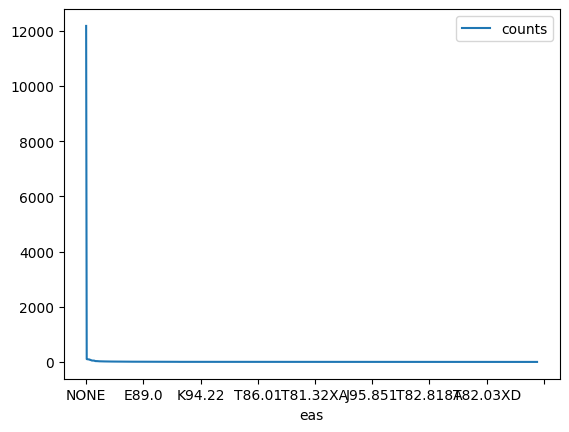

In [8]:
ds_cantidad_TieneEA_EA1 = df_goldStandardTrainingEAs.TieneEA_EA1.value_counts(dropna=True, sort=True)
ds_cantidad_EA2 = df_goldStandardTrainingEAs.EA2.value_counts(dropna=True, sort=True)
ds_all = ds_cantidad_TieneEA_EA1.append(ds_cantidad_EA2)
ds_cantidad_EA3 = df_goldStandardTrainingEAs.EA3.value_counts(dropna=True, sort=True)
ds_all = ds_all.append(ds_cantidad_EA3)
ds_cantidad_EA4 = df_goldStandardTrainingEAs.EA4.value_counts(dropna=True, sort=True)
ds_all = ds_all.append(ds_cantidad_EA4)
ds_cantidad_EA5 = df_goldStandardTrainingEAs.EA5.value_counts(dropna=True, sort=True)
ds_all = ds_all.append(ds_cantidad_EA5)
ds_cantidad_EA6 = df_goldStandardTrainingEAs.EA6.value_counts(dropna=True, sort=True)
ds_all = ds_all.append(ds_cantidad_EA6)
ds_cantidad_EA7 = df_goldStandardTrainingEAs.EA7.value_counts(dropna=True, sort=True)
ds_all = ds_all.append(ds_cantidad_EA7)
ds_cantidad_EA8 = df_goldStandardTrainingEAs.EA8.value_counts(dropna=True, sort=True)
ds_all = ds_all.append(ds_cantidad_EA8)
ds_cantidad_EA9 = df_goldStandardTrainingEAs.EA9.value_counts(dropna=True, sort=True)
ds_all = ds_all.append(ds_cantidad_EA9)

df_cantidad = pd.DataFrame(ds_all)
df_cantidad = df_cantidad.reset_index()
df_cantidad.columns = ['eas', 'counts'] 
df_cantidad = df_cantidad.sort_values(by=['counts'], ascending=False)
df_cantidad.plot(x='eas', y='counts', kind='line')	

<Axes: xlabel='eas'>

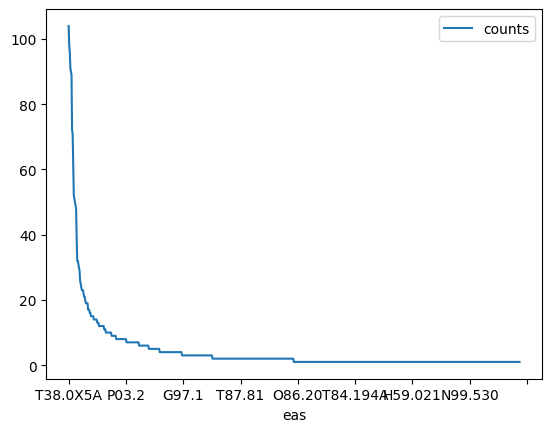

In [9]:
df_cantidad_con_EAs = df_cantidad.query("eas != 'NONE'")
df_cantidad_con_EAs.plot(x='eas', y='counts', kind='line')	

array([[<Axes: title={'center': 'counts'}>]], dtype=object)

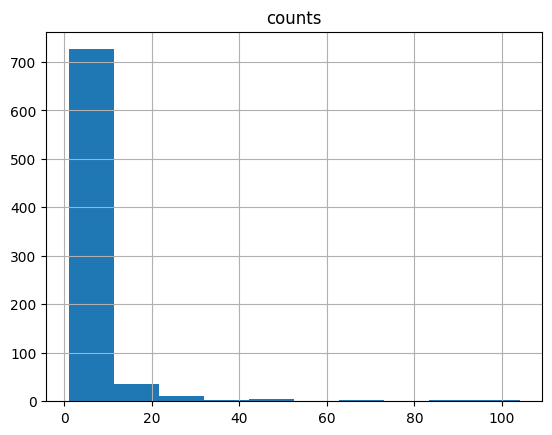

In [10]:
df_cantidad_con_EAs.hist(bins = 10)

**Estadísticas de EAs**

In [11]:
num_actos_clinicos = df_goldStandardTrainingEAs.Acto.count()
num_actos_clinicos_sin_EA = df_goldStandardTrainingEAs.query("TieneEA_EA1 == 'NONE'").TieneEA_EA1.count()
num_actos_clinicos_con_EA = num_actos_clinicos - num_actos_clinicos_sin_EA
num_eas_con_caso_clinico = df_cantidad.query("eas != 'NONE'")["eas"].nunique()

print("Actos clínicos: %s" % num_actos_clinicos)
print("Número de actos clínicos sin EA: %s, un %s%%" % (num_actos_clinicos_sin_EA, round(num_actos_clinicos_sin_EA/num_actos_clinicos*100, 2)))
print("Número de actos clínicos con EA: %s, un %s%%" % (num_actos_clinicos_con_EA, round(num_actos_clinicos_con_EA/num_actos_clinicos*100, 2)))
print("EAs diferentes encontrados en los actos clínicos: %s" % num_eas_con_caso_clinico)
print("")
print("Los 10 códigos CIE más populares:")

df_cantidad.query("eas != 'NONE'").head(10)

Actos clínicos: 14502
Número de actos clínicos sin EA: 12181, un 84.0%
Número de actos clínicos con EA: 2321, un 16.0%
EAs diferentes encontrados en los actos clínicos: 484

Los 10 códigos CIE más populares:


,eas,counts
1,T38.0X5A,104
2,T45.515A,98
3,T50.2X5A,96
4,Y95,91
5,P01.1,90
6,T81.4XXA,89
7,T45.1X5A,72
8,Y83.1,71
401,Y84.8,62
9,O75.2,52


#EAs disponibles

Se han identificado 4 tipos:
* *MED*: efectos adversos a medicamentos, vacunas o similar.
* *PROC*: complicaciones en procedimientos (por ej. cirugías).
* *DISP*: fallos en dispositivos médicos.
* *INF*: infecciones, ya sean nosocomiales o durante un tratamiento médico.

Carga del archivo de texto EAs.txt en un data set

In [12]:
df_EAs = pd.read_csv(EAs_data_location, sep='-', header=None, names=["Code", "Tipo"])
df_EAs['Code'] = df_EAs['Code'].str.strip()

NameError: ignored

Consulta la cantidad de datos

In [ ]:
df_EAs.count()

Consulta de las primeras filas del data set

In [ ]:
df_EAs.head()

Cantidad de EAs por tipo

In [ ]:
df_EAs.Tipo.value_counts()

Relación entre EAs totales frente a los EAs con ejemplos disponibles

In [ ]:
num_eas_totales = df_EAs["Code"].nunique()
rel_eas = round(num_eas_con_caso_clinico/num_eas_totales*100,2)
print("EAs totales: %s" % num_eas_totales)
print("EAs con representanción en caso clínico: %s" % num_eas_con_caso_clinico)
print("El %s%% de los EAs se dan en al menos un caso clínico." % rel_eas)

#Definición del CIE10

Carga del archivo de texto CIE-10.tsv en un data set

In [ ]:
df_CIE10 = pd.read_csv(CIE10_data_location, sep='\t', header=(0), low_memory=False)
df_CIE10.info()

Consulta de las primeras filas del data set

In [ ]:
df_CIE10.head()

Conteo de los datos del dataset.

In [ ]:
df_CIE10.count()

Tomamos el fichero de códigos EAs y buscamos los registros en el fichero del CIE 10 que coincidan con su código.

In [ ]:
listaCodigosEAs = list(df_EAs.Code.values)
df_CIE10_EAs_Parcial = df_CIE10[df_CIE10['Code'].isin(listaCodigosEAs)]
df_CIE10_EAs_Parcial.head()

Contamos los registros encontrados en el fichero CIE10. El número coincide con el número de dato del fichero EAs.

In [ ]:
df_CIE10_EAs_Parcial.count()

De los datos encontrados en el fichero CIE10, se determinan cuántos de los códigos son finales y los que no lo son.

In [ ]:
df_CIE10_EAs_Parcial.Final.value_counts()

Se crea una lista con los códigos no finales, por cada uno de ellos se buscan los que continúan la jerarquía. Por ejemplo, para el código "D70" que no es final, se buscan los códigos "D70.0", "D70.1", "D70.2", ... que sí lo son. Además, se a la lista de códigos EA completa los códigos finales.

In [ ]:
listaCodigosEAsCompleta=[]
listaCodigosEAsNoFinal = list(df_CIE10_EAs_Parcial[df_CIE10_EAs_Parcial.Final == 0].Code.values)
for ea in listaCodigosEAsNoFinal:
  listaCodigosEAsCompleta.extend(list(df_CIE10[df_CIE10['Code'].str.startswith(ea)].Code))
listaCodigosEAsCompleta.extend(list(df_CIE10_EAs_Parcial[df_CIE10_EAs_Parcial.Final == 1].Code.values))

Se toma la lista de códigos completa y se busca sobre el fichero CIE10, obteniendo con ello el subconjunto de códigos CIE10 que se correspoden con EAs.

In [ ]:
df_CIE10_EAs_Completa = df_CIE10[df_CIE10['Code'].isin(listaCodigosEAsCompleta)]


In [ ]:
df_CIE10_EAs_Completa.count()

In [ ]:
num_eas_totales = df_CIE10_EAs_Completa["Code"].nunique()
rel_eas = round(num_eas_con_caso_clinico/num_eas_totales*100,2)
print("EAs totales (considerando la lista completa): %s" % num_eas_totales)
print("EAs con representanción en caso clínico: %s" % num_eas_con_caso_clinico)
print("El %s%% de los EAs se dan en al menos un caso clínico." % rel_eas)

In [ ]:
#df_CIE10_EAs_Completa.to_csv(base_path + 'df_CIE10_EAs_Completa.csv')

#Composición de los informes médicos


In [13]:
from unidecode import unidecode
import re
import os

re_anonimizacion = re.compile(r'_\w+_XXXX_')
re_solo_texto = re.compile(r'[^\w]')
re_es_marca_pagina = re.compile(r'pagina [0-9] \/ [0-9]')
re_firma_servicio = re.compile(r'servicio de [a-z]*')

re_juicio1 = re.compile(r'juicio [a-z]*')
re_juicio2 = re.compile(r'j[a-z]* clinico')

campos = ["nif", "telefono", "movil", "fecha ingreso", "fecha alta"]

def omitir_textos_anonimizacion (linea):
  # busca expresiones del tipo _HOSPITAL_XXXX_ _DIRECCION_XXXX_
  return re_anonimizacion.sub ('', linea)

def normalizar_texto (linea):
  linea = unidecode(linea) 
  linea = linea.lower()
  return linea

def omitir_no_texto (linea):
  return re_solo_texto.sub (' ', linea)

def detectar_etiquetas (linea):
  words = linea.strip().split()
  if len(words) >= 1 and len(words) <= 3:
      return linea
  return ""        
  
def es_marca_pagina (linea):
  if (re_es_marca_pagina.match (linea)):
    return ""
  return linea

def es_firma_de_servicio (linea):
  if (re_firma_servicio.match (linea)):
    return ""
  return linea

def quitar_campos (linea):
  for campo in campos:
    if (campo in linea):
      return ""
  return linea  

In [14]:
lista_archivos_entrenamiento = [f for f in os.listdir(ruta_archivos_entrenamiento) 
        if os.path.isfile(os.path.join(ruta_archivos_entrenamiento, f))]

In [ ]:
lista_ficheros_con_juicio = list()
lista_ficheros_con_gestacion = list()
lista_ficheros_resto = list()

for nombre_informe in lista_archivos_entrenamiento:
  encontrado = False
  with open (ruta_archivos_entrenamiento + nombre_informe, 'rt') as informe_medico:    
    for lineaTexto in informe_medico:    
      lineaTexto = normalizar_texto(lineaTexto.strip()) 
      lineaTexto = omitir_textos_anonimizacion(lineaTexto.strip()) 
      if ("jdtco" in lineaTexto or "jc" in lineaTexto 
          or re_juicio1.match (lineaTexto) != None
          or re_juicio2.match (lineaTexto) != None):
        encontrado = True
        lista_ficheros_con_juicio.append(nombre_informe)
        break
  if (not encontrado):        
    with open (ruta_archivos_entrenamiento + nombre_informe, 'rt') as informe_medico:    
      for lineaTexto in informe_medico:    
        lineaTexto = normalizar_texto(lineaTexto.strip()) 
        lineaTexto = omitir_textos_anonimizacion(lineaTexto.strip()) 
        if ("gestacion" in lineaTexto):
          encontrado = True
          lista_ficheros_con_gestacion.append(nombre_informe)
          break
  if (not encontrado):
    lista_ficheros_resto.append(nombre_informe)

total_fichero_entrenamiento = len(lista_archivos_entrenamiento)
total_ficheros_con_juicio = len(lista_ficheros_con_juicio)   
total_ficheros_con_gestacion = len(lista_ficheros_con_gestacion)   
total_ficheros_sin_seccion = len(lista_ficheros_resto)   

print("Número total de ficheros de entrenamiento: %s" % total_fichero_entrenamiento)
print("Número total de ficheros CON sección de juicio clínico: %s, un %s%% del total" % 
      (total_ficheros_con_juicio, round(total_ficheros_con_juicio/total_fichero_entrenamiento*100, 2)))
print("Número total de ficheros CON sección de gestación (obstétricos): %s, un %s%% del total"  % 
      (total_ficheros_con_gestacion, round(total_ficheros_con_gestacion/total_fichero_entrenamiento*100, 2)))
print("Número total de ficheros sin sección: %s, un %s%% del total"  % 
      (total_ficheros_sin_seccion, round(total_ficheros_sin_seccion/total_fichero_entrenamiento*100, 2)))      

Lista de ficheros que tienen otras secciones y además tienen algún EA

In [ ]:
lista_actos_con_EA = list()

for archivo in lista_ficheros_resto:     
  resultado = df_goldStandardTrainingEAs.query("Acto == " + archivo.split("-")[0])
  if (resultado.TieneEA_EA1.item() != "NONE"):
    lista_actos_con_EA.append(archivo)

lista_actos_con_EA     

['28110281-172829921.txt',
 '28170070-172944052.txt',
 '27077815-169870323.txt',
 '27108053-170138671.txt',
 '27418011-171011614.txt',
 '26532121-168358988.txt',
 '26233466-167448297.txt',
 '25954796-167234095.txt',
 '25534095-165673211.txt',
 '25696839-165881896.txt',
 '25696839-165892145.txt',
 '25082563-164281968.txt',
 '25135315-164508150.txt',
 '24804681-163277298.txt',
 '24851863-163469662.txt',
 '24911805-163716937.txt',
 '24472493-162517340.txt',
 '24566071-162693008.txt',
 '24587560-162743130.txt',
 '24649380-162872040.txt',
 '24695760-163055865.txt',
 '24720463-163051400.txt',
 '24352126-162148285.txt',
 '24023988-161086821.txt']

Lista de secciones de los ficheros outlayers

In [ ]:
lista_etiquetas_ficheros = list()

for nombre_informe in lista_ficheros_resto:
  with open (ruta_archivos_entrenamiento + nombre_informe, 'rt') as informe_medico: 
    lista_etiquetas_informe = list() 
    for lineaTexto in informe_medico:     
      lineaTexto = omitir_textos_anonimizacion(lineaTexto) 
      lineaTexto = normalizar_texto(lineaTexto)
      lineaTexto = es_marca_pagina(lineaTexto) 
      lineaTexto = es_firma_de_servicio(lineaTexto) 
      lineaTexto = quitar_campos(lineaTexto) 
      lineaTexto = omitir_no_texto(lineaTexto)
      etiqueta = detectar_etiquetas(lineaTexto)
      if (etiqueta != ""):
        lista_etiquetas_informe.append(etiqueta.strip())  
  lista_etiquetas_ficheros.append([nombre_informe, lista_etiquetas_informe])

lista_etiquetas_ficheros

[['28321067-173577657.txt', ['sexo  mujer']],
 ['28322510-173390710.txt',
  ['bajo anestesia general',
   'tratamiento a seguir',
   'reposo relativo',
   'oclusion 24h od']],
 ['28405251-173677510.txt',
  ['sexo  mujer',
   'motivo de alta',
   'antecedentes personales',
   'colitis ulcerosa',
   'hipercolesterolemia',
   'anemia ferropenica',
   'no habitos toxicos',
   'pruebas complentarias',
   'estudio  esofagogastroduodenal',
   'minimo  reflujo  gastroesofagico',
   'tratamiento quirurgico',
   'evolucion']],
 ['28419501-173677606.txt',
  ['sexo  mujer',
   'motivo de alta',
   'alergias',
   'sin alertas conocidas',
   'recomendaciones']],
 ['28465274-173944798.txt',
  ['sexo  hombre',
   'solicitud de arteriografia',
   'antecedentes',
   'no alergias conocidas',
   'no habitos toxicos',
   'cx  polipos colonicos',
   'tratamiento actual',
   'suspender adiro',
   'pruebas realizadas',
   'diagnostico']],
 ['28471496-173878846.txt',
  ['sexo  hombre',
   'antecedentes',
   'a